# Loading

In [1]:
!pip install -qq datasets librosa soundfile

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

from tqdm.notebook import tqdm

from datasets import load_dataset

In [3]:
dataset = load_dataset("danavery/urbansound8K")

Found cached dataset parquet (/Users/alexeyum/.cache/huggingface/datasets/danavery___parquet/danavery--urbansound8K-0451d478d9953c7d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

# Dataset examples and ranges

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['audio', 'slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class'],
        num_rows: 8732
    })
})

In [5]:
dataset['train'][3]['audio']

{'path': '100263-2-0-126.wav',
 'array': array([ 2.59399414e-04,  1.52587891e-05, -2.13623047e-04, ...,
         3.05175781e-04,  4.73022461e-04, -9.46044922e-04]),
 'sampling_rate': 44100}

In [6]:
pd.DataFrame(dataset['train'][0]['audio']['array']).describe()

,0
count,14004.000000
mean,-0.000005
std,0.164412
min,-0.966873
25%,-0.026585
50%,-0.000366
75%,0.020615
max,0.999969


In [7]:
pd.DataFrame(dataset['train'][1]['audio']['array']).describe()

,0
count,176400.000000
mean,-0.000067
std,0.004148
min,-0.025650
25%,-0.002625
50%,-0.000046
75%,0.002548
max,0.029205


# Sample length distribution

In [8]:
file_lengths = []
for i in tqdm(range(len(dataset['train']))):
    file_lengths.append(dataset['train'][i]['audio']['array'].size)

  0%|          | 0/8732 [00:00<?, ?it/s]

In [9]:
pd.Series(file_lengths).value_counts()

176400    4523
192000    2120
384000     460
96000       83
64000       40
          ... 
138048       1
51587        1
47866        1
45844        1
154614       1
Length: 1107, dtype: int64

<AxesSubplot:>

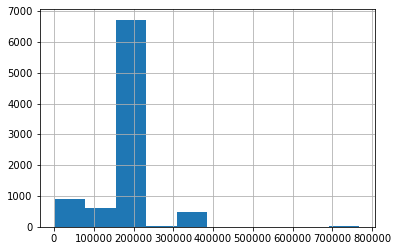

In [10]:
pd.Series(file_lengths).hist()

# Sampling rates

In [12]:
sampling_rates = {}

for i in tqdm(range(len(dataset['train']))):
    sr = dataset['train'][i]['audio']['sampling_rate']
    if sr not in sampling_rates:
        sampling_rates[sr] = 0
    sampling_rates[sr] += 1

  0%|          | 0/8732 [00:00<?, ?it/s]

In [14]:
sorted(sampling_rates.items(), key=lambda item: -item[1])

[(44100, 5370),
 (48000, 2502),
 (96000, 610),
 (24000, 82),
 (16000, 45),
 (22050, 44),
 (11025, 39),
 (192000, 17),
 (8000, 12),
 (11024, 7),
 (32000, 4)]

# Loading examples (android loading debug)

In [11]:
dataset['train'][21]['audio']

{'path': '100795-3-1-2.wav',
 'array': array([ 0.00088501,  0.00045776,  0.00056458, ..., -0.01872253,
        -0.04367065, -0.07025146]),
 'sampling_rate': 44100}

In [12]:
pd.DataFrame(dataset['train'][21]['audio']['array']).describe()

,0
count,176400.000000
mean,-0.000096
std,0.082874
min,-0.653763
25%,-0.004608
50%,-0.000122
75%,0.004364
max,0.682388


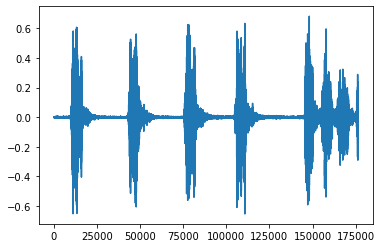

In [13]:
plt.plot(dataset['train'][21]['audio']['array'])

In [17]:
dataset['train'][21]['audio']['array'] * 32768

array([   29. ,    15. ,    18.5, ...,  -613.5, -1431. , -2302. ])

In [15]:
0.5 * (-39.0 + 97.0)

29.0